### Objective
The rising potential of this comparatively under-the-radar market fuels the need for an ML-based solution to develop a dynamic pricing strategy for used and refurbished smartphones. ReCell, a startup aiming to tap the potential in this market, has hired you as a data scientist. They want you to analyze the data provided and build a linear regression model to predict the price of a used phone and identify factors that significantly influence it.

 

### Data Description
The data contains the different attributes of used/refurbished phones. The detailed data dictionary is given below.

### Data Dictionary

brand_name: Name of manufacturing brand

os: OS on which the phone runs

screen_size: Size of the screen in cm

4g: Whether 4G is available or not

5g: Whether 5G is available or not

main_camera_mp: Resolution of the rear camera in megapixels

selfie_camera_mp: Resolution of the front camera in megapixels

int_memory: Amount of internal memory (ROM) in GB

ram: Amount of RAM in GB

battery: Energy capacity of the phone battery in mAh

weight: Weight of the phone in grams

release_year: Year when the phone model was released

days_used: Number of days the used/refurbished phone has been used

new_price: Price of a new phone of the same model in euros

used_price: Price of the used/refurbished phone in euros

In [59]:
#import needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [60]:
#import data set
data = pd.read_csv("used_phone_data.csv")

### Data Overview
Observations

Sanity checks

In [61]:
#check the data shape
data.shape

(3571, 15)

In [62]:
#view the column names and data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3571 entries, 0 to 3570
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   brand_name        3571 non-null   object 
 1   os                3571 non-null   object 
 2   screen_size       3571 non-null   float64
 3   4g                3571 non-null   object 
 4   5g                3571 non-null   object 
 5   main_camera_mp    3391 non-null   float64
 6   selfie_camera_mp  3569 non-null   float64
 7   int_memory        3561 non-null   float64
 8   ram               3561 non-null   float64
 9   battery           3565 non-null   float64
 10  weight            3564 non-null   float64
 11  release_year      3571 non-null   int64  
 12  days_used         3571 non-null   int64  
 13  new_price         3571 non-null   float64
 14  used_price        3571 non-null   float64
dtypes: float64(9), int64(2), object(4)
memory usage: 418.6+ KB


In [63]:
#view a sample of the data
data.head(10)

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,new_price,used_price
0,Honor,Android,23.97,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,111.62,86.96
1,Honor,Android,28.10,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,249.39,161.49
2,Honor,Android,24.29,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,359.47,268.55
3,Honor,Android,26.04,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,278.93,180.23
4,Honor,Android,15.72,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,140.87,103.80
5,Honor,Android,21.43,yes,no,13.0,8.0,64.0,4.0,4000.0,176.0,2020,223,157.70,113.67
6,Honor,Android,19.84,yes,no,8.0,5.0,32.0,2.0,3020.0,144.0,2020,234,91.74,72.29
7,Honor,Android,18.57,yes,no,13.0,8.0,64.0,4.0,3400.0,164.0,2020,219,179.24,132.91
8,Honor,Android,15.72,yes,no,13.0,16.0,128.0,6.0,4000.0,165.0,2020,161,200.32,150.88
9,Honor,Android,21.43,yes,no,13.0,8.0,128.0,6.0,4000.0,176.0,2020,327,159.75,103.59


## Exploratory Data Analysis (EDA)
EDA is an important part of any project involving data.
It is important to investigate and understand the data better before building a model with it.
A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
A thorough analysis of the data, in addition to the questions mentioned below, should be done.

#### Questions:

What does the distribution of used phone prices look like?

What percentage of the used phone market is dominated by Android devices?

The amount of RAM is important for the smooth functioning of a phone. How does the amount of RAM vary with the brand?

A large battery often increases a phone's weight, making it feel uncomfortable in the hands. How does the weight vary for phones offering large batteries (more than 4500 mAh)?

Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones are available across different brands with a screen size larger than 6 inches?

Budget phones nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of budget phones offering greater than 8MP selfie cameras across brands?

Which attributes are highly correlated with the used phone price?


In [64]:
data.isnull().sum()

brand_name            0
os                    0
screen_size           0
4g                    0
5g                    0
main_camera_mp      180
selfie_camera_mp      2
int_memory           10
ram                  10
battery               6
weight                7
release_year          0
days_used             0
new_price             0
used_price            0
dtype: int64

In [65]:
data.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
brand_name,3571,34,Others,509,NaN,NaN,NaN,NaN,NaN,NaN,NaN
os,3571,4,Android,3246,NaN,NaN,NaN,NaN,NaN,NaN,NaN
screen_size,3571,NaN,NaN,NaN,14.8039,5.15309,2.7,12.7,13.49,16.51,46.36
4g,3571,2,yes,2359,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5g,3571,2,no,3419,NaN,NaN,NaN,NaN,NaN,NaN,NaN
main_camera_mp,3391,NaN,NaN,NaN,9.40045,4.8184,0.08,5,8,13,48
selfie_camera_mp,3569,NaN,NaN,NaN,6.54735,6.87936,0.3,2,5,8,32
int_memory,3561,NaN,NaN,NaN,54.5326,84.6962,0.005,16,32,64,1024
ram,3561,NaN,NaN,NaN,4.05696,1.39184,0.03,4,4,4,16
battery,3565,NaN,NaN,NaN,3067.23,1364.21,80,2100,3000,4000,12000


We have 3571 rows and 15 columns.  4 of the variables are object datatype and I need to look closer at those and then likely create dummy columns for use on the model.  I also want to look more closely at release year which is int64 datatype.  The earliest release year is 2013 and the most current release year is 2020 but it may make sense to change that to a date type field.  I also need to take a closer look at the rest of the fields to determine if there are any unit issues to be addressed.

There is also some missing data which needs to be addressed before building the model. 

In [66]:
data.nunique()

brand_name            34
os                     4
screen_size          127
4g                     2
5g                     2
main_camera_mp        44
selfie_camera_mp      37
int_memory            16
ram                   14
battery              354
weight               613
release_year           8
days_used            930
new_price           3099
used_price          3044
dtype: int64

In [67]:
#Look at a random sample to get a better sense of the consistancy of the data
np.random.seed(1)
data.sample(n=10)

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,new_price,used_price
2501,Samsung,Android,13.49,yes,no,13.0,13.0,32.0,4.00,3600.0,181.0,2017,683,198.680,79.47
2782,Sony,Android,13.81,yes,no,NaN,8.0,32.0,4.00,3300.0,156.0,2019,195,198.150,149.10
605,Others,Android,12.70,yes,no,8.0,5.0,16.0,4.00,2400.0,137.0,2015,1048,161.470,48.39
2923,Vivo,Android,19.37,yes,no,13.0,16.0,64.0,4.00,3260.0,149.3,2019,375,211.880,138.31
941,Others,Others,5.72,no,no,0.3,0.3,32.0,0.25,820.0,90.0,2013,883,29.810,8.92
1833,LG,Android,13.49,no,no,8.0,1.3,32.0,4.00,3140.0,161.0,2013,670,240.540,96.18
671,Apple,iOS,14.92,yes,no,12.0,7.0,64.0,4.00,5493.0,48.0,2018,403,700.150,350.08
1796,LG,Android,17.78,yes,no,5.0,0.3,16.0,4.00,4000.0,294.8,2014,708,189.300,75.94
757,Asus,Android,13.49,yes,no,13.0,8.0,32.0,4.00,5000.0,181.0,2017,612,270.500,108.13
3528,Realme,Android,15.72,yes,no,NaN,16.0,64.0,4.00,4035.0,184.0,2019,433,159.885,80.00


#### There are four operating systems, 34 brand names and 8 release years.  4g and 5g are yes / no values.   

### Univariate Analysis

In [68]:
#Define a function to graph the numeric variables

def hist_box_plot(data, feature, figsize=(12,7), kde=False, bins = None):
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows=2, sharex=True, gridspec_kw={"height_ratios": (0.25, 0.75)}, figsize=figsize,)
    sns.boxplot(data=data, x=feature, ax=ax_box2, showmeans=True, color='orange')
    sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette='winter')if bins else sns.histplot( data=data, x=feature, kde=kde, ax=ax_hist2)
    ax_hist2.axvline(data[feature].mean(), color='green', linestyle="--")
    ax_hist2.axvline(data[feature].median(), color="orange", linestyle="-")
    

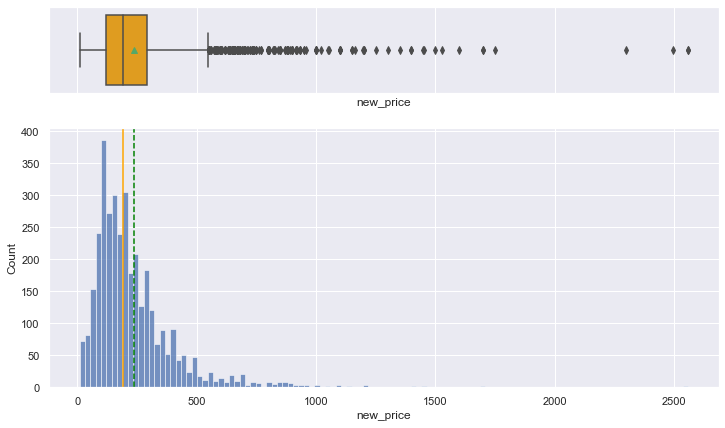

In [69]:
hist_box_plot(data, "new_price")

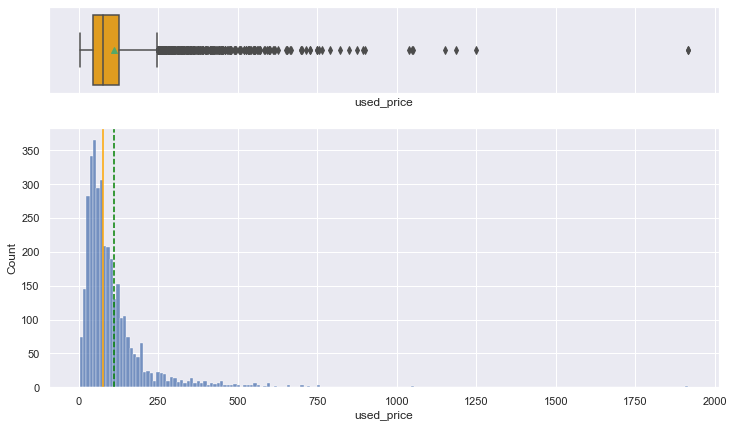

In [70]:
hist_box_plot(data, 'used_price')

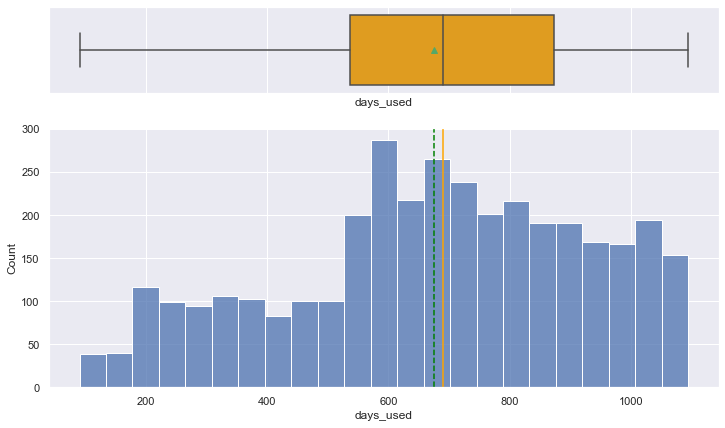

In [71]:
hist_box_plot(data,"days_used")

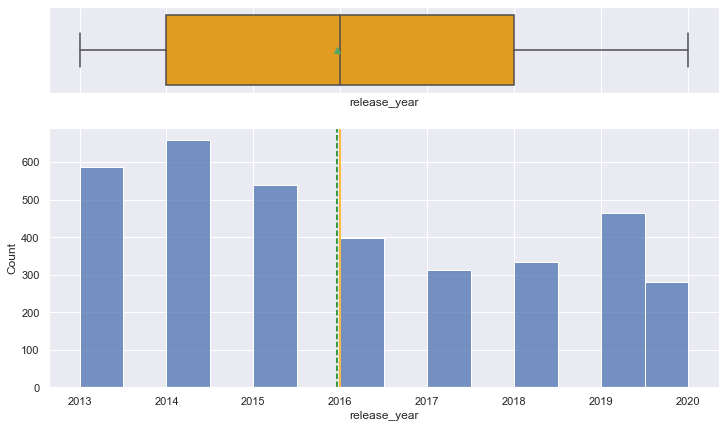

In [72]:
hist_box_plot(data,'release_year')

In [73]:
data['release_year'].value_counts()

2014    658
2013    587
2015    539
2019    464
2016    397
2018    333
2017    313
2020    280
Name: release_year, dtype: int64

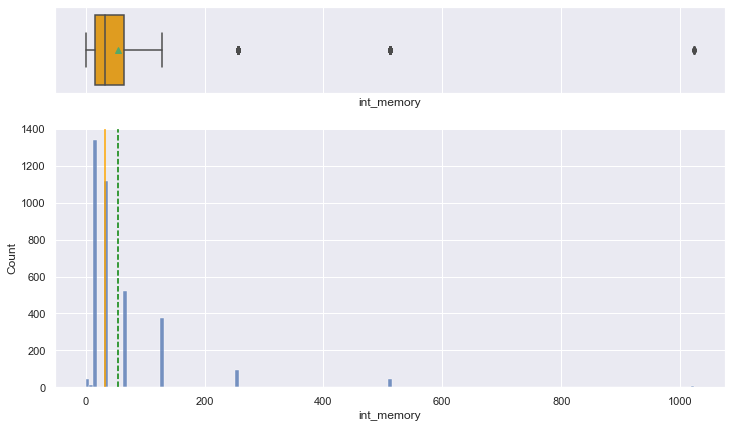

In [74]:
hist_box_plot(data,'int_memory')

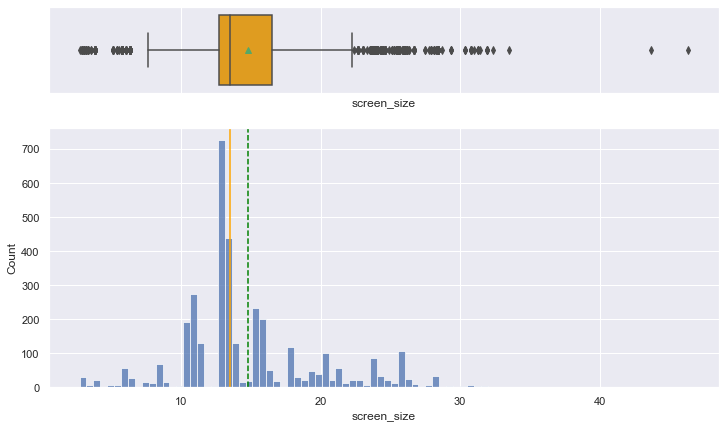

In [75]:
hist_box_plot(data,'screen_size')

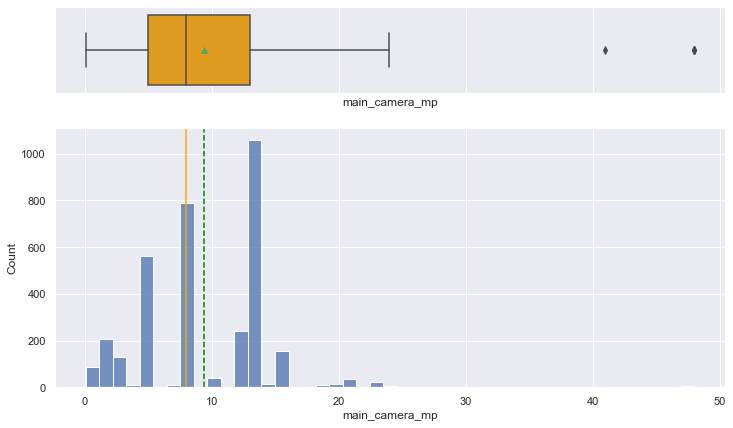

In [76]:
hist_box_plot(data,'main_camera_mp')

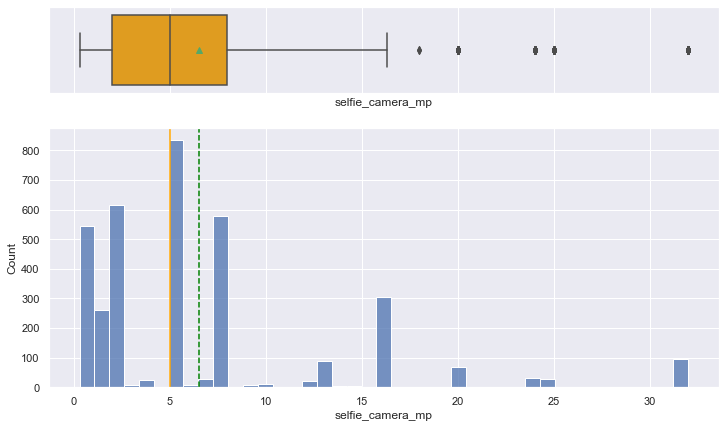

In [77]:
hist_box_plot(data,'selfie_camera_mp')

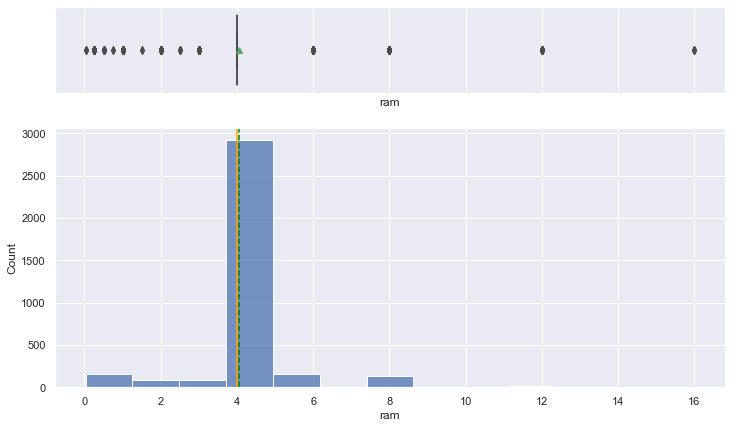

In [78]:
hist_box_plot(data,'ram')

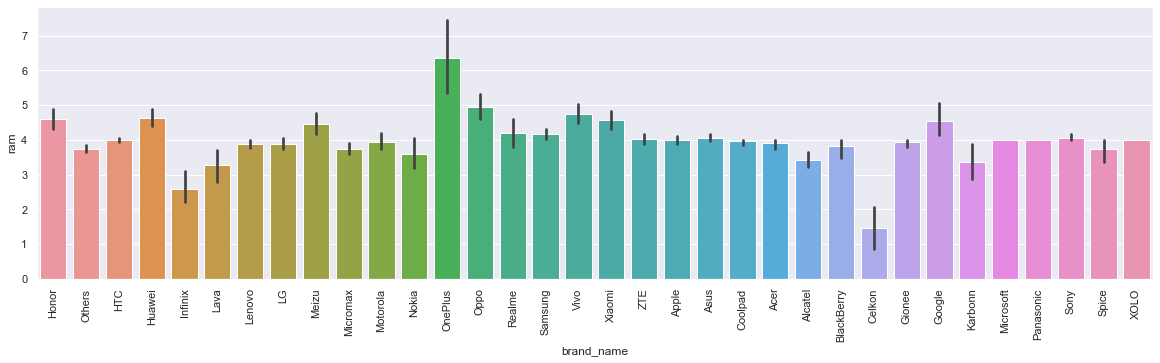

In [79]:
plt.figure(figsize=(20, 5))

sns.barplot(data=data, y="ram", x="brand_name")
plt.xticks(rotation=90)

plt.show()

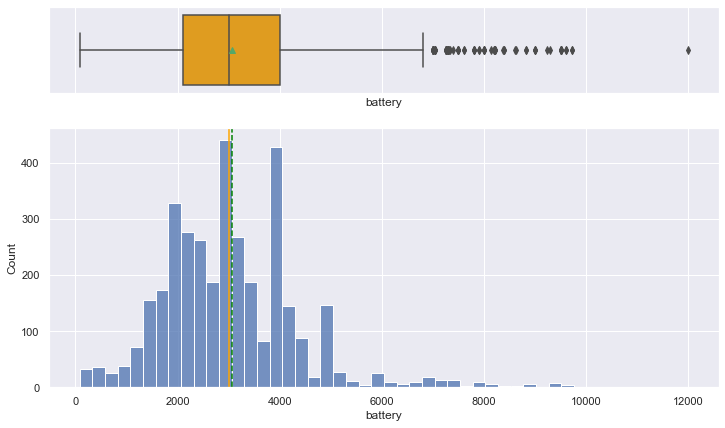

In [80]:
hist_box_plot(data,'battery')

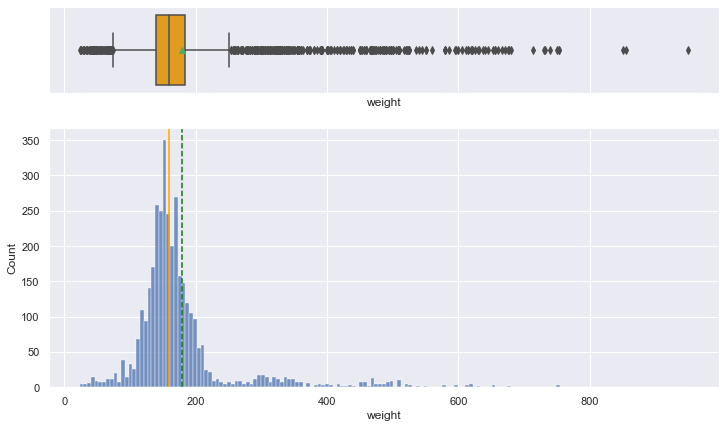

In [81]:
hist_box_plot(data,'weight')

In [82]:
#compare the market share for the different operating systems

def barplot(data, variable, perc=False, n=None):
    
    total = len(data[variable])  # length of the column
    count = data[variable].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=variable,
        palette="Paired",
        order=data[variable].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot
        
        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot


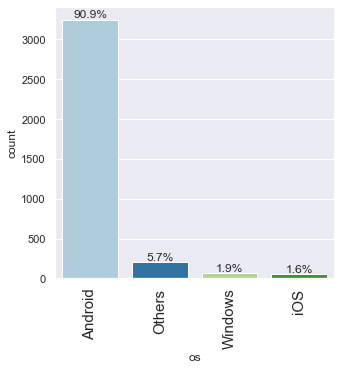

In [83]:
barplot(data, 'os', perc=True)

#### Both new and used price are heavily right skewed with lots of outliers.  Both screen size and int_memory have many outliers as well.  

#### The Android operating system accounts for 90% of the used phone market.

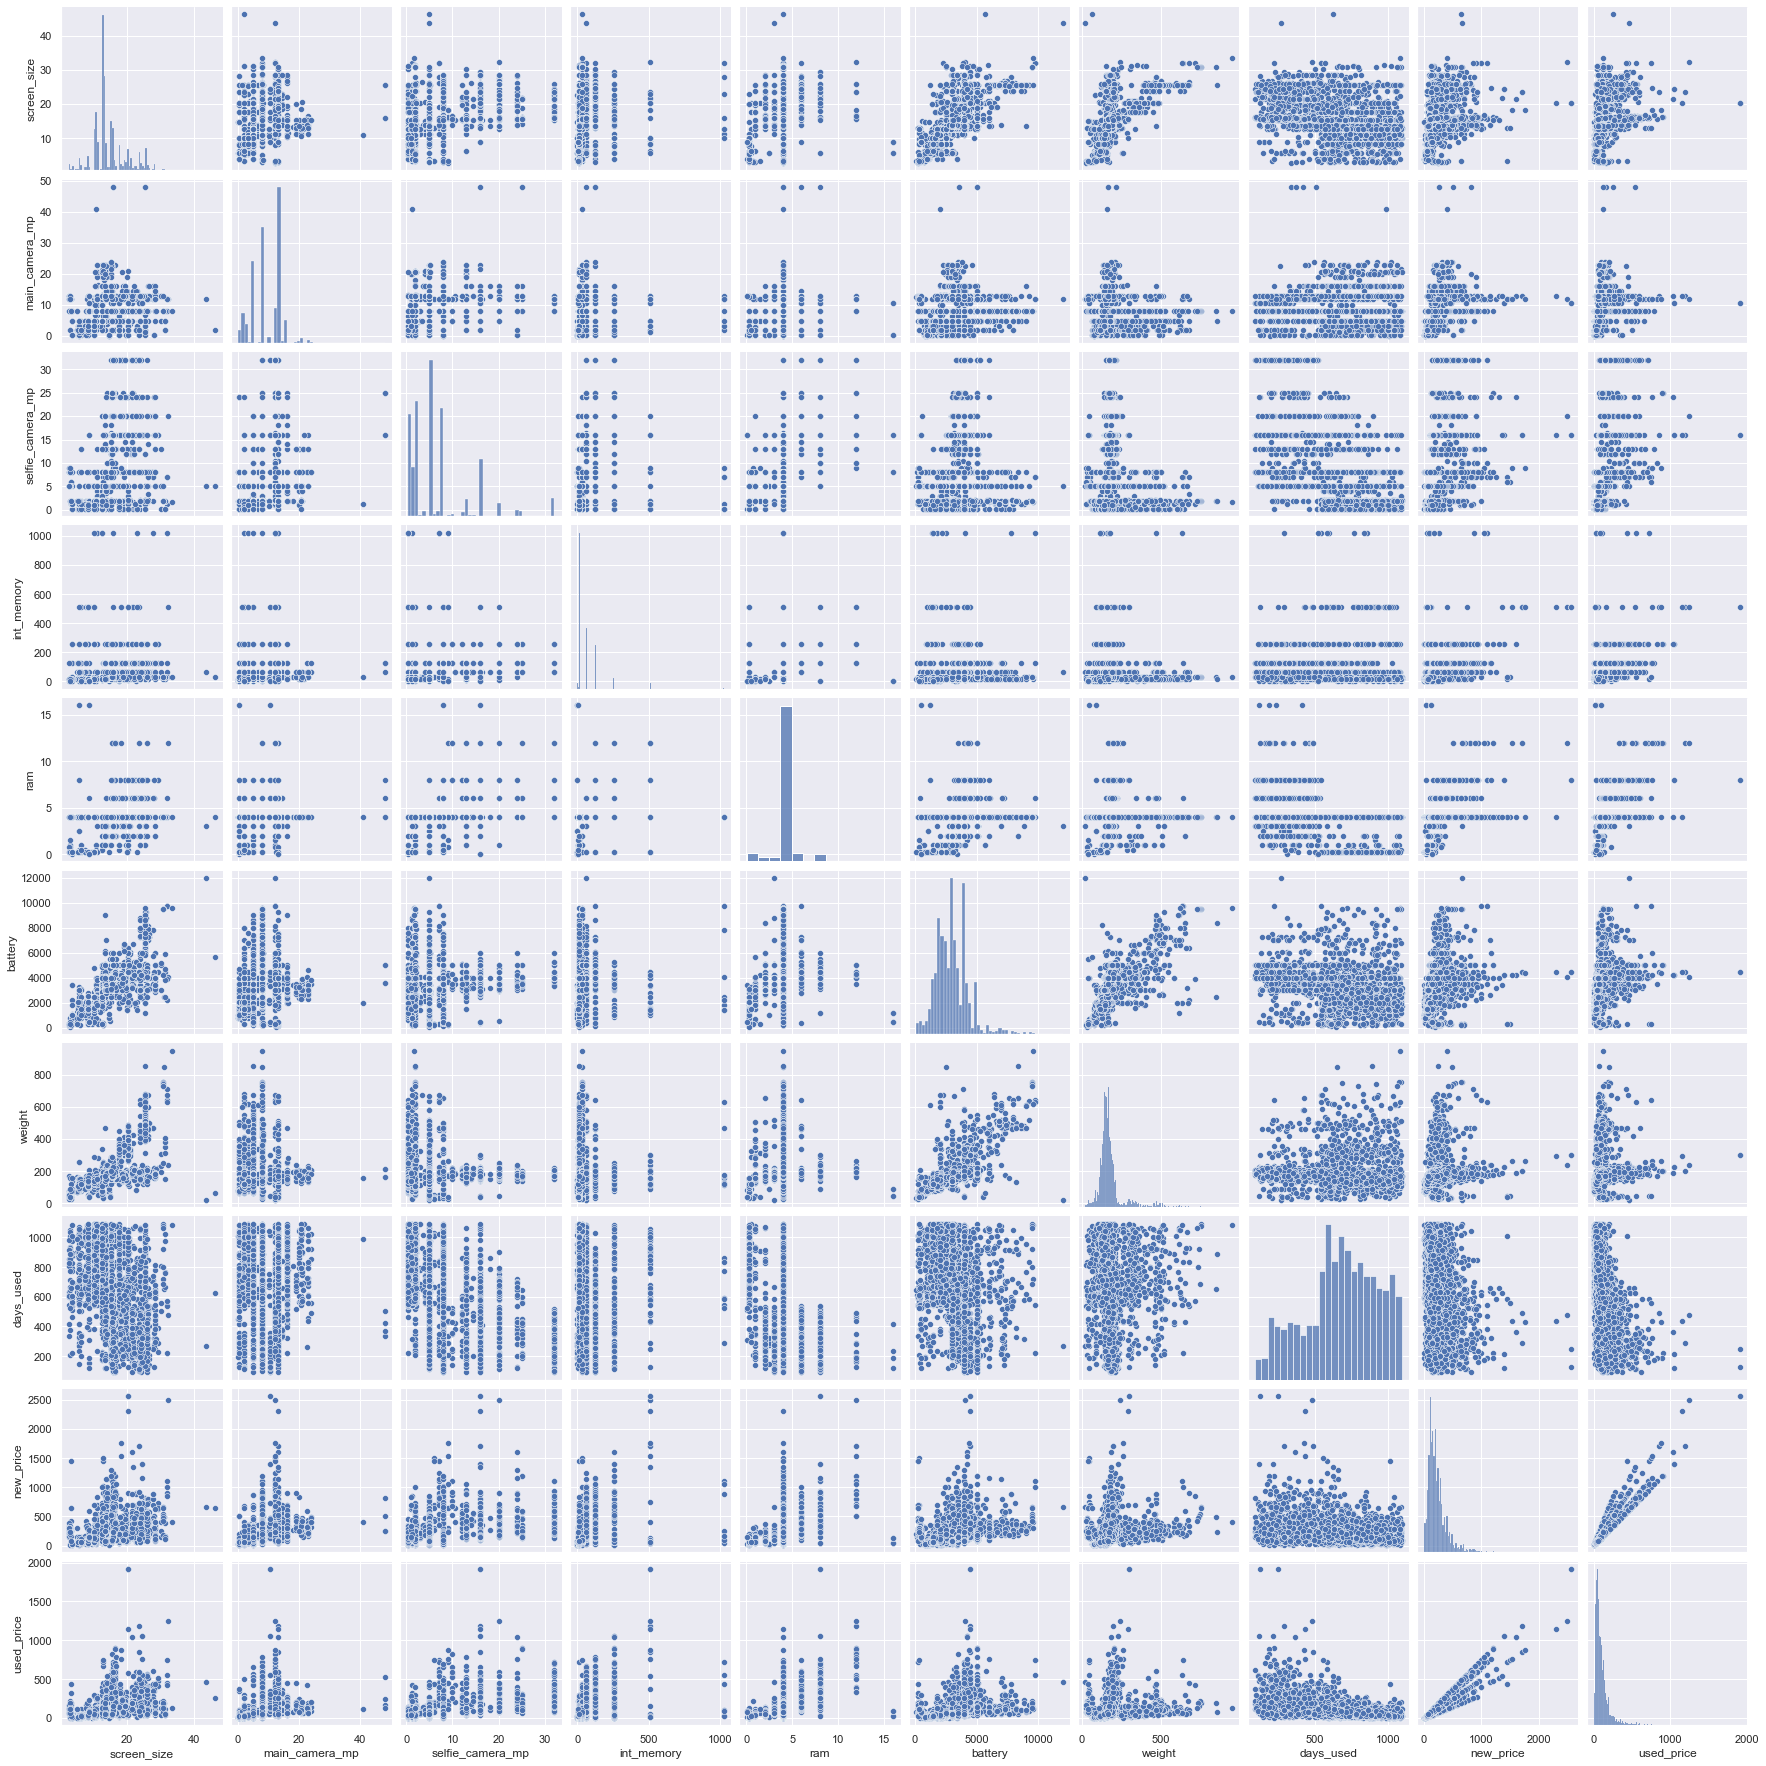

In [84]:
#Bivariate analysis - pairplot the numeric values
numbercols = data.select_dtypes(include=np.number).columns.tolist()
numbercols.remove("release_year")  #drop release year

sns.pairplot(data[numbercols])
plt.show()

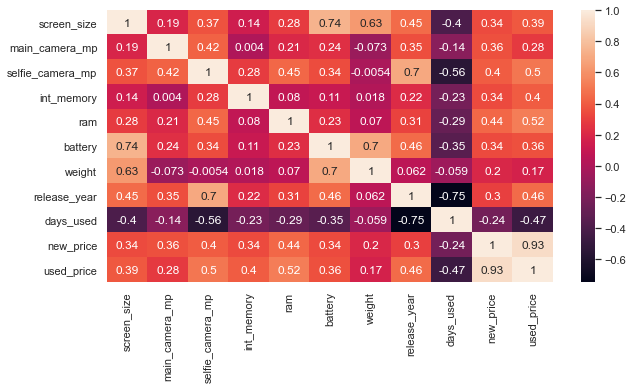

In [85]:
plt.figure(figsize=(10,5))
sns.heatmap(data.corr(), annot=True)
plt.show()

In [86]:
data[data.columns[:]].corr()["used_price"][:]

screen_size         0.385928
main_camera_mp      0.281065
selfie_camera_mp    0.497530
int_memory          0.404913
ram                 0.522659
battery             0.363767
weight              0.170654
release_year        0.456764
days_used          -0.470760
new_price           0.926087
used_price          1.000000
Name: used_price, dtype: float64

#### Ram and new price have the greatest correlation with used_price.  Days used has a negative correltion with used_price

#### I see a very strong correlation between new_price and used_price. I also see a strong negative correlation between days used and release year and days used and selfie camera mp and days used and used price. There also appears to be some correlation between battery, weight and screen size.

#### Now I will take a closer look at certain variables (not already addressed above) based on the questions in the project notebook.

Start with RAM

In [87]:
ramdata= data.groupby("brand_name")['ram'].mean()
ramdata.describe()

count    34.000000
mean      3.991285
std       0.754070
min       1.466216
25%       3.770667
50%       4.000000
75%       4.186177
max       6.363636
Name: ram, dtype: float64

#### The average amount of Ram is 4 GB with a maximun amount of 6.36 ram and minimum amount of 1.47.

In [88]:
# closer look at screen size
screens = data.copy()
screens['screen_size_inches']=screens["screen_size"]*.3937
screens.describe()

,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,new_price,used_price,screen_size_inches
count,3571.000000,3391.000000,3569.000000,3561.000000,3561.000000,3565.000000,3564.000000,3571.000000,3571.000000,3571.000000,3571.000000,3571.000000
mean,14.803892,9.400454,6.547352,54.532607,4.056962,3067.225666,179.424285,2015.964996,675.391487,237.389037,109.880277,5.828292
std,5.153092,4.818396,6.879359,84.696246,1.391844,1364.206665,90.280856,2.291784,248.640972,197.545581,121.501226,2.028772
min,2.700000,0.080000,0.300000,0.005000,0.030000,80.000000,23.000000,2013.000000,91.000000,9.130000,2.510000,1.062990
25%,12.700000,5.000000,2.000000,16.000000,4.000000,2100.000000,140.000000,2014.000000,536.000000,120.130000,45.205000,4.999990
50%,13.490000,8.000000,5.000000,32.000000,4.000000,3000.000000,159.000000,2016.000000,690.000000,189.800000,75.530000,5.311013
75%,16.510000,13.000000,8.000000,64.000000,4.000000,4000.000000,184.000000,2018.000000,872.000000,291.935000,126.000000,6.499987
max,46.360000,48.000000,32.000000,1024.000000,16.000000,12000.000000,950.000000,2020.000000,1094.000000,2560.200000,1916.540000,18.251932


In [89]:
print(screens.groupby('brand_name')['screen_size_inches'].max().sort_values(ascending=True))
print(screens.groupby('brand_name')['screen_size_inches'].max().count())

brand_name
Karbonn        6.999986
Panasonic      7.188962
Celkon         7.936992
HTC            8.562975
Micromax       9.062974
Coolpad        9.311005
Lava           9.436989
Realme         9.562973
Oppo           9.562973
Spice          9.999980
LG            10.062972
Acer          10.062972
Sony          10.062972
Alcatel       10.062972
Google        10.125964
XOLO          10.188956
OnePlus       10.188956
Microsoft     10.373995
Motorola      10.999978
Infinix       11.125962
Nokia         11.188954
ZTE           11.188954
Huawei        11.188954
Gionee        11.188954
BlackBerry    11.188954
Asus          11.188954
Meizu         11.188954
Vivo          11.562969
Honor         11.936984
Others        12.373991
Apple         12.562967
Xiaomi        12.751943
Lenovo        13.188950
Samsung       18.251932
Name: screen_size_inches, dtype: float64
34


#### all 34 brands offer screen sizes greater than 6 inches

#### Now let's look at selfie cameras with at least 8mp that cost less than 250 Euros across brands

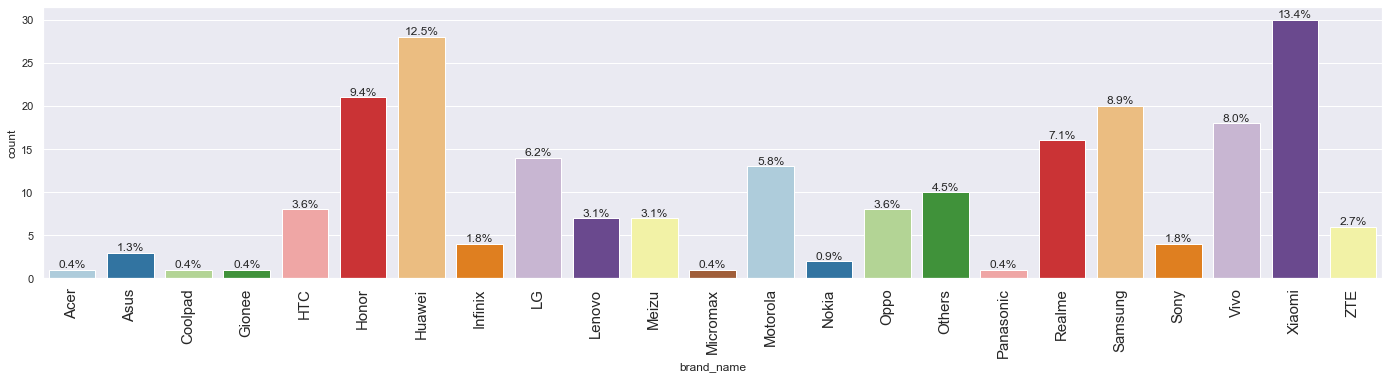

In [90]:
selfies=data.loc[(data['selfie_camera_mp'] > 8.0) & (data["new_price"]<250)]
barplot(selfies, 'brand_name', perc=True)

#### There are 23 budget brands(less than 250 Euros) that offer high mp selfie cameras.  That is 68% of the brands are offering these high mp, low cost phones.

#### Data Preprocessing
Now I want to address the null values and create dummy columns for my object data types.


Missing value treatment

Feature engineering (if needed)

Outlier detection and treatment (if needed)

Preparing data for modeling

Any other preprocessing steps (if needed)

In [91]:
#Create a copy of the data set before I start making changes
data2=data.copy()
data2.head(10)

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,new_price,used_price
0,Honor,Android,23.97,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,111.62,86.96
1,Honor,Android,28.10,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,249.39,161.49
2,Honor,Android,24.29,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,359.47,268.55
3,Honor,Android,26.04,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,278.93,180.23
4,Honor,Android,15.72,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,140.87,103.80
5,Honor,Android,21.43,yes,no,13.0,8.0,64.0,4.0,4000.0,176.0,2020,223,157.70,113.67
6,Honor,Android,19.84,yes,no,8.0,5.0,32.0,2.0,3020.0,144.0,2020,234,91.74,72.29
7,Honor,Android,18.57,yes,no,13.0,8.0,64.0,4.0,3400.0,164.0,2020,219,179.24,132.91
8,Honor,Android,15.72,yes,no,13.0,16.0,128.0,6.0,4000.0,165.0,2020,161,200.32,150.88
9,Honor,Android,21.43,yes,no,13.0,8.0,128.0,6.0,4000.0,176.0,2020,327,159.75,103.59


In [92]:
#Use the median of the variable to impute the missing values
print(data2['main_camera_mp'].isnull().sum())
data2['main_camera_mp'].fillna(data2['main_camera_mp'].median(), inplace=True)  
data2['main_camera_mp'].isnull().sum()

180


0

In [93]:
#Use the median of the variable to impute the missing values
print(data2['selfie_camera_mp'].isnull().sum())
data2['selfie_camera_mp'].fillna(data2['selfie_camera_mp'].median(), inplace=True)  
data2['selfie_camera_mp'].isnull().sum()

2


0

In [94]:
#Use the median of the variable to impute the missing values
print(data2['int_memory'].isnull().sum())
data2['int_memory'].fillna(data2['int_memory'].median(), inplace=True)  
data2['int_memory'].isnull().sum()

10


0

In [95]:
#Use the median of the variable to impute the missing values
print(data2['ram'].isnull().sum())
data2['ram'].fillna(data2['ram'].median(), inplace=True)  
data2['ram'].isnull().sum()

10


0

In [96]:
print(data2['battery'].isnull().sum())
data2['battery'].fillna(data2['battery'].median(), inplace=True)  
data2['battery'].isnull().sum()

6


0

In [97]:
print(data2['weight'].isnull().sum())
data2['weight'].fillna(data2['weight'].median(), inplace=True)  
data2['weight'].isnull().sum()

7


0

In [98]:
data2.isnull().sum()

brand_name          0
os                  0
screen_size         0
4g                  0
5g                  0
main_camera_mp      0
selfie_camera_mp    0
int_memory          0
ram                 0
battery             0
weight              0
release_year        0
days_used           0
new_price           0
used_price          0
dtype: int64

#### days_used is highly correlated with release year so I am going to drop that column

In [99]:
data2.drop(['days_used'],axis=1,inplace=True)

#### Now that I have addressed the missing values and days_used, I will address the outliers.  There are several columns with significant outliers but I am concerned that they are valid data points.  I am going to take a closer look at int_memory, selfie_camera_mp and main_camera_mp because they look like they might have just a few outliers.

In [100]:
data2[data2['int_memory'] == max(data2['int_memory'])]

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,new_price,used_price
666,Apple,iOS,31.91,yes,no,12.00,7.0,1024.0,4.0,9720.0,631.0,2018,1100.86,550.40
667,Apple,iOS,27.94,yes,no,12.00,7.0,1024.0,4.0,7812.0,468.0,2018,879.10,439.68
815,Asus,Android,12.70,no,no,8.00,0.3,1024.0,4.0,2500.0,160.0,2014,98.93,29.70
834,Asus,Android,11.27,no,no,13.00,1.2,1024.0,4.0,1820.0,126.0,2014,258.53,103.40
1530,Lava,Android,10.16,no,no,2.00,0.3,1024.0,4.0,1400.0,113.0,2013,51.16,25.70
2015,Micromax,Android,23.02,no,no,3.15,0.3,1024.0,4.0,1450.0,118.0,2013,90.37,27.08
2341,Others,Android,12.70,no,no,5.00,0.3,1024.0,4.0,2200.0,170.0,2013,170.00,84.86
2445,Samsung,Android,15.88,yes,no,12.00,9.0,1024.0,4.0,4100.0,175.0,2019,1050.76,726.73


#### There are 8 records that make up that max int_memory value.  I am going to use the IQR method to address these outliers.

In [101]:
def outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3-Q1
    lower_whisker = Q1 - 1.5 * IQR
    upper_whisker = Q3 + 1.5 * IQR
    df[col] = np.clip(df[col], lower_whisker, upper_whisker)
    
    return df
    

In [102]:
outliers(data2, 'int_memory')

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,new_price,used_price
0,Honor,Android,23.97,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,111.6200,86.96
1,Honor,Android,28.10,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,249.3900,161.49
2,Honor,Android,24.29,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,359.4700,268.55
3,Honor,Android,26.04,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,278.9300,180.23
4,Honor,Android,15.72,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,140.8700,103.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3566,Asus,Android,15.88,yes,no,8.0,8.0,64.0,6.0,5000.0,190.0,2019,654.5000,490.96
3567,Asus,Android,15.24,yes,no,13.0,8.0,128.0,8.0,4000.0,200.0,2018,518.8145,259.30
3568,Alcatel,Android,18.73,yes,no,13.0,5.0,32.0,3.0,4000.0,165.0,2020,92.6500,69.81
3569,Alcatel,Android,18.73,yes,no,13.0,5.0,32.0,2.0,4000.0,160.0,2020,101.9150,76.07


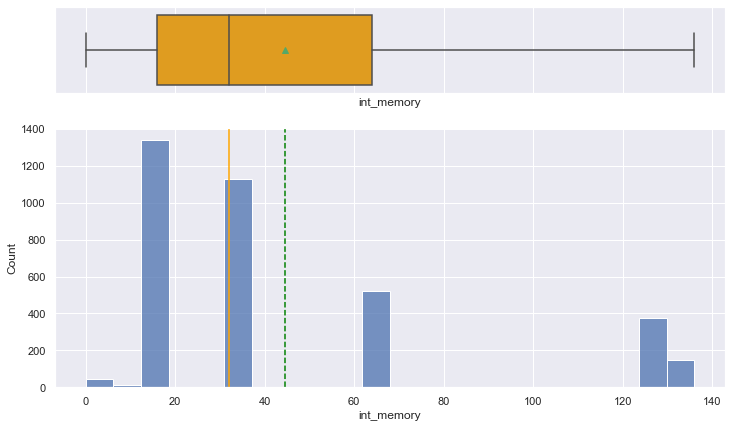

In [103]:
#make sure that worked by graphing the variable
hist_box_plot(data2,'int_memory')

#### Now I will look at selfie_camera_mp

In [104]:
data2[data2['selfie_camera_mp'] == max(data2['selfie_camera_mp'])]

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,new_price,used_price
17,Honor,Android,19.37,yes,no,13.0,32.0,128.0,6.0,3750.0,172.0,2019,249.1200,161.05
42,Huawei,Android,19.37,yes,no,13.0,32.0,64.0,6.0,4000.0,178.0,2019,199.2500,147.94
48,Huawei,Android,19.37,yes,no,13.0,32.0,128.0,6.0,4000.0,178.0,2019,290.1200,217.83
53,Huawei,Android,21.43,yes,no,13.0,32.0,128.0,8.0,3500.0,171.0,2019,389.6500,252.92
54,Huawei,Android,21.43,yes,no,13.0,32.0,128.0,8.0,3500.0,171.0,2019,359.7900,250.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3545,Samsung,Android,16.35,yes,no,8.0,32.0,128.0,6.0,4500.0,186.0,2020,382.4575,285.06
3547,Samsung,Android,16.35,yes,no,12.0,32.0,128.0,6.0,4500.0,179.0,2019,279.6500,211.16
3548,Samsung,Android,16.03,yes,no,12.0,32.0,64.0,4.0,4000.0,172.0,2019,222.6915,143.54
3553,Samsung,Android,16.35,yes,yes,12.0,32.0,128.0,6.0,4500.0,206.0,2019,847.5690,598.02


#### There are 94 records that have the maximun selfie camera value.  So I am going to leave this one alone.

#### Now I will look at main_camera_mp

In [105]:
data2[data2['main_camera_mp'] == max(data2['main_camera_mp'])]

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,new_price,used_price
216,ZTE,Android,25.56,yes,no,48.0,16.0,128.0,8.0,5000.0,215.0,2019,819.5700,533.34
221,ZTE,Android,25.56,yes,no,48.0,16.0,64.0,6.0,5000.0,215.0,2019,501.5600,250.83
3354,Motorola,Android,15.88,yes,no,48.0,25.0,128.0,4.0,3600.0,165.0,2019,254.9915,164.69
3497,Motorola,Android,15.88,yes,no,48.0,25.0,128.0,4.0,3600.0,165.0,2019,254.9915,127.72


#### There are 4 records that have the max main_camera_mp value.  So I will apply my outlier treatment to this variable.

In [106]:
outliers(data2, 'main_camera_mp')

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,new_price,used_price
0,Honor,Android,23.97,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,111.6200,86.96
1,Honor,Android,28.10,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,249.3900,161.49
2,Honor,Android,24.29,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,359.4700,268.55
3,Honor,Android,26.04,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,278.9300,180.23
4,Honor,Android,15.72,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,140.8700,103.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3566,Asus,Android,15.88,yes,no,8.0,8.0,64.0,6.0,5000.0,190.0,2019,654.5000,490.96
3567,Asus,Android,15.24,yes,no,13.0,8.0,128.0,8.0,4000.0,200.0,2018,518.8145,259.30
3568,Alcatel,Android,18.73,yes,no,13.0,5.0,32.0,3.0,4000.0,165.0,2020,92.6500,69.81
3569,Alcatel,Android,18.73,yes,no,13.0,5.0,32.0,2.0,4000.0,160.0,2020,101.9150,76.07


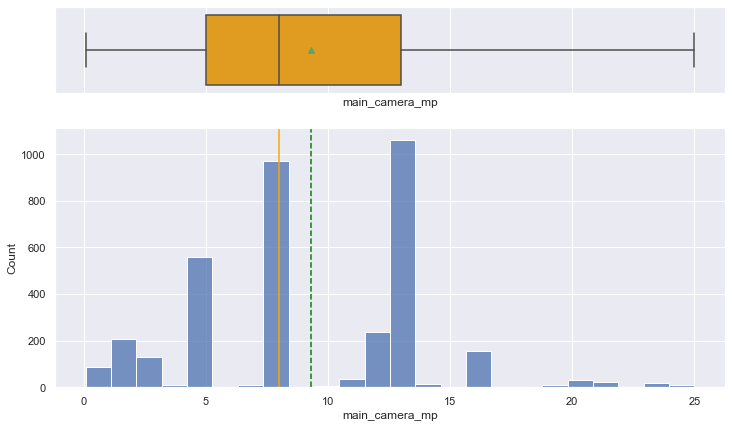

In [107]:
#making sure that worked
hist_box_plot(data2,'main_camera_mp')

In [108]:
#quick look at my stats 
data2.describe().T

,count,mean,std,min,25%,50%,75%,max
screen_size,3571.0,14.803892,5.153092,2.700,12.700,13.49,16.510,46.36
main_camera_mp,3571.0,9.299619,4.530650,0.080,5.000,8.00,13.000,25.00
selfie_camera_mp,3571.0,6.546486,6.877529,0.300,2.000,5.00,8.000,32.00
int_memory,3571.0,44.583202,38.938853,0.005,16.000,32.00,64.000,136.00
ram,3571.0,4.056802,1.389897,0.030,4.000,4.00,4.000,16.00
battery,3571.0,3067.112714,1363.062572,80.000,2100.000,3000.00,4000.000,12000.00
weight,3571.0,179.384248,90.196828,23.000,140.000,159.00,184.000,950.00
release_year,3571.0,2015.964996,2.291784,2013.000,2014.000,2016.00,2018.000,2020.00
new_price,3571.0,237.389037,197.545581,9.130,120.130,189.80,291.935,2560.20
used_price,3571.0,109.880277,121.501226,2.510,45.205,75.53,126.000,1916.54


#### I am going to use log transformation on battery and weight.  They are heavily right skewed.

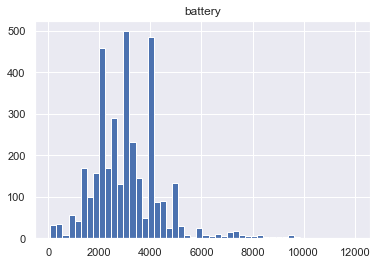

0


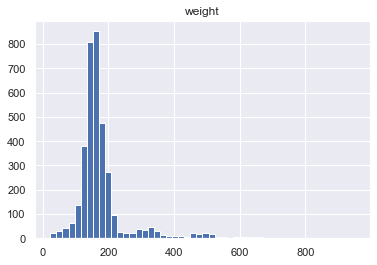

0


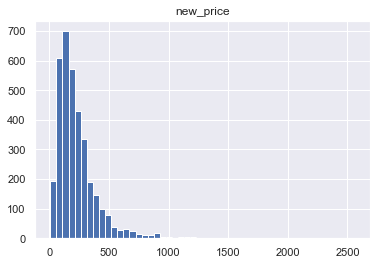

0


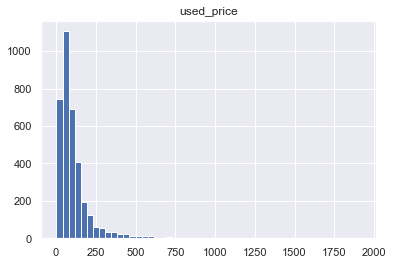

0


In [109]:
cols_to_log = ['battery','weight', 'new_price', 'used_price']
for colname in cols_to_log:
    plt.hist(data2[colname], bins=50)
    plt.title(colname)
    plt.show()
    print(np.sum(data2[colname] <= 0))

In [110]:
for colname in cols_to_log:
    data2[colname + '_log'] = np.log(data2[colname] + 1)
data2.drop(cols_to_log, axis=1, inplace=True)

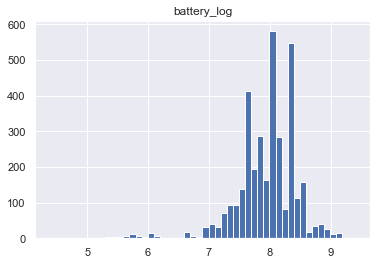

0


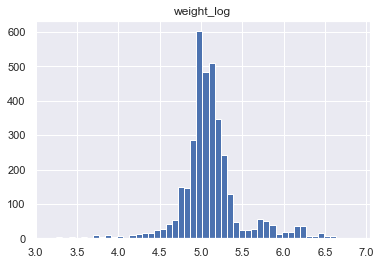

0


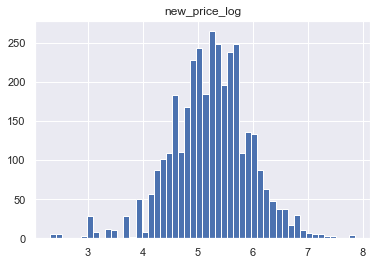

0


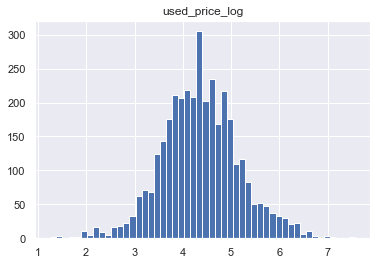

0


In [111]:
cols_to_log = ['battery_log', 'weight_log','new_price_log','used_price_log']
for colname in cols_to_log:
    plt.hist(data2[colname], bins=50)
    plt.title(colname)
    plt.show()
    print(np.sum(data2[colname] <= 0))

In [112]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3571 entries, 0 to 3570
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   brand_name        3571 non-null   object 
 1   os                3571 non-null   object 
 2   screen_size       3571 non-null   float64
 3   4g                3571 non-null   object 
 4   5g                3571 non-null   object 
 5   main_camera_mp    3571 non-null   float64
 6   selfie_camera_mp  3571 non-null   float64
 7   int_memory        3571 non-null   float64
 8   ram               3571 non-null   float64
 9   release_year      3571 non-null   int64  
 10  battery_log       3571 non-null   float64
 11  weight_log        3571 non-null   float64
 12  new_price_log     3571 non-null   float64
 13  used_price_log    3571 non-null   float64
dtypes: float64(9), int64(1), object(4)
memory usage: 390.7+ KB


In [113]:
#change the object data types to categories
data2['brand_name'] = data2['brand_name'].astype('category')
data2['os'] = data2['os'].astype('category')
data2['4g'] = data2['4g'].astype('category')
data2['5g'] = data2['5g'].astype('category')


In [114]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3571 entries, 0 to 3570
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   brand_name        3571 non-null   category
 1   os                3571 non-null   category
 2   screen_size       3571 non-null   float64 
 3   4g                3571 non-null   category
 4   5g                3571 non-null   category
 5   main_camera_mp    3571 non-null   float64 
 6   selfie_camera_mp  3571 non-null   float64 
 7   int_memory        3571 non-null   float64 
 8   ram               3571 non-null   float64 
 9   release_year      3571 non-null   int64   
 10  battery_log       3571 non-null   float64 
 11  weight_log        3571 non-null   float64 
 12  new_price_log     3571 non-null   float64 
 13  used_price_log    3571 non-null   float64 
dtypes: category(4), float64(9), int64(1)
memory usage: 294.9 KB


### Linear Model Building
* Encode the categorical features
* Split the data into train and test data
* Build the linear regression model
* Check the model's performance

In [115]:
#create dummies for the object variables
data2=pd.get_dummies(data2, columns=data2.select_dtypes(include=['category']).columns.tolist(), drop_first=True)
data2.head()

,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,release_year,battery_log,weight_log,new_price_log,used_price_log,...,brand_name_Spice,brand_name_Vivo,brand_name_XOLO,brand_name_Xiaomi,brand_name_ZTE,os_Others,os_Windows,os_iOS,4g_yes,5g_yes
0,23.97,13.0,5.0,64.0,3.0,2020,8.013343,4.990433,4.724019,4.476882,...,0,0,0,0,0,0,0,0,1,0
1,28.10,13.0,16.0,128.0,8.0,2020,8.366603,5.365976,5.523020,5.090616,...,0,0,0,0,0,0,0,0,1,1
2,24.29,13.0,8.0,128.0,8.0,2020,8.343078,5.365976,5.887409,5.596754,...,0,0,0,0,0,0,0,0,1,1
3,26.04,13.0,8.0,64.0,6.0,2020,8.888895,6.175867,5.634540,5.199767,...,0,0,0,0,0,0,0,0,1,1
4,15.72,13.0,8.0,64.0,3.0,2020,8.517393,5.225747,4.954911,4.652054,...,0,0,0,0,0,0,0,0,1,0


In [116]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3571 entries, 0 to 3570
Data columns (total 48 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   screen_size            3571 non-null   float64
 1   main_camera_mp         3571 non-null   float64
 2   selfie_camera_mp       3571 non-null   float64
 3   int_memory             3571 non-null   float64
 4   ram                    3571 non-null   float64
 5   release_year           3571 non-null   int64  
 6   battery_log            3571 non-null   float64
 7   weight_log             3571 non-null   float64
 8   new_price_log          3571 non-null   float64
 9   used_price_log         3571 non-null   float64
 10  brand_name_Alcatel     3571 non-null   uint8  
 11  brand_name_Apple       3571 non-null   uint8  
 12  brand_name_Asus        3571 non-null   uint8  
 13  brand_name_BlackBerry  3571 non-null   uint8  
 14  brand_name_Celkon      3571 non-null   uint8  
 15  bran

In [117]:
#Create the dependent and independent variables
X = data2.drop(['used_price_log'], axis=1)
y = data2[['used_price_log']]

In [118]:
#split into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)
print("Rows in train data =", X_train.shape[0])
print("Rows in test data =", X_test.shape[0])

Rows in train data = 2499
Rows in test data = 1072


In [119]:
linearregression = LinearRegression()
linearregression.fit(X_train, y_train)


LinearRegression()

In [120]:
coef_data = pd.DataFrame(np.append(linearregression.coef_, linearregression.intercept_), index=X_train.columns.tolist()+ ["Intercept"], columns=["Coefficients"])
coef_data

,Coefficients
screen_size,0.007039
main_camera_mp,-0.008457
selfie_camera_mp,0.003306
int_memory,0.000398
ram,0.005885
release_year,0.085497
battery_log,0.019629
weight_log,-0.054306
new_price_log,0.989863
brand_name_Alcatel,-0.004156


In [121]:
import statsmodels.api as sm

X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

olsmodel = sm.OLS(y_train, X_train).fit()
print(olsmodel.summary())

                            OLS Regression Results                            
Dep. Variable:         used_price_log   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     959.9
Date:                Thu, 19 Aug 2021   Prob (F-statistic):               0.00
Time:                        14:38:57   Log-Likelihood:                 662.83
No. Observations:                2499   AIC:                            -1230.
Df Residuals:                    2451   BIC:                            -950.1
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  -173.11

### Checking Linear Regression Assumptions
#### In order to make statistical inferences from a linear regression model, it is important to ensure that the assumptions of linear regression are satisfied.

Start by checking for multicolinearity using VIF

In [122]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def check_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

In [123]:
check_vif(X_train)

,feature,VIF
0,const,2.553155e+06
1,screen_size,3.028941e+00
2,main_camera_mp,2.229590e+00
3,selfie_camera_mp,3.064168e+00
4,int_memory,2.239812e+00
5,ram,1.766355e+00
6,release_year,3.313685e+00
7,battery_log,3.677821e+00
8,weight_log,3.093762e+00
9,new_price_log,3.168680e+00


In [124]:
def treating_multicollinearity(predictors, target, high_vif_columns):
    
    adj_r2 = []
    rmse = []
    
    for cols in high_vif_columns:
        train = predictors.loc[:, ~predictors.columns.str.startswith(cols)]

        olsmodel = sm.OLS(target, train).fit()

        adj_r2.append(olsmodel.rsquared_adj)
        rmse.append(np.sqrt(olsmodel.mse_resid))

    mc_check = pd.DataFrame(
        {
            "col": high_vif_columns,
            "Adj. R-squared after_dropping col": adj_r2,
            "RMSE after dropping col": rmse,
        }
    ).sort_values(by="Adj. R-squared after_dropping col", ascending=False)
    mc_check.reset_index(drop=True, inplace=True)

    return mc_check

In [125]:
col_list= ['brand_name_Others','brand_name_Samsung','brand_name_Huawei', 'brand_name_LG']
res=treating_multicollinearity(X_train,y_train, col_list)
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,brand_name_Others,0.947505,0.187370
1,brand_name_Huawei,0.947501,0.187378
2,brand_name_LG,0.947497,0.187385
3,brand_name_Samsung,0.947494,0.187391


#### Dropping these values has very little affect on the adjusted R-squared value.  I can see that dropping brand_name_Samsung would have the greatest impact on the predictive ability of the model.  I will start by dropping brand_name_Others because it had the highest VIF.

In [126]:
col_to_drop = "brand_name_Others"
x_train2 = X_train.loc[:, ~X_train.columns.str.startswith(col_to_drop)]
x_test2 = X_test.loc[:, ~X_test.columns.str.startswith(col_to_drop)]


vif = check_vif(x_train2)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  brand_name_Others


,feature,VIF
0,const,2.552285e+06
1,screen_size,3.026688e+00
2,main_camera_mp,2.229476e+00
3,selfie_camera_mp,3.064153e+00
4,int_memory,2.238169e+00
5,ram,1.765901e+00
6,release_year,3.311787e+00
7,battery_log,3.677065e+00
8,weight_log,3.093705e+00
9,new_price_log,3.167901e+00


#### After dropping Brand_Name_Other, none of the other variables have a p-value greater than 5. I will now re-run the model.

In [127]:
olsmodel1=sm.OLS(y_train, x_train2).fit()
print(olsmodel1.summary())

                            OLS Regression Results                            
Dep. Variable:         used_price_log   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     981.2
Date:                Thu, 19 Aug 2021   Prob (F-statistic):               0.00
Time:                        14:39:14   Log-Likelihood:                 662.79
No. Observations:                2499   AIC:                            -1232.
Df Residuals:                    2452   BIC:                            -957.9
Df Model:                          46                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  -173.14

Adjusted Rsquared is .94.8 which seems really good.  It was unaffected by the variable we dropped.  

#### Now I will consider the p-values.

In [128]:
#I am going to use this loop to drop one column at a time based on the p-value.    
# list of columns
cols = x_train2.columns.tolist()

# setting a max p-value
max_p_value = 1

while len(cols) > 0:
    x_train_aux = x_train2[cols]

    # fitting the model
    model = sm.OLS(y_train, x_train_aux).fit()

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_columns = cols
print(selected_columns)

['const', 'screen_size', 'main_camera_mp', 'selfie_camera_mp', 'int_memory', 'release_year', 'weight_log', 'new_price_log', 'brand_name_Celkon', 'brand_name_Infinix', 'brand_name_Meizu', 'brand_name_Motorola', 'brand_name_Panasonic', 'brand_name_Realme', '4g_yes', '5g_yes']


In [129]:
x_train3 = x_train2[selected_columns]
x_test3 = x_test2[selected_columns]

In [130]:
olsmodel3 = sm.OLS(y_train, x_train3).fit()
print(olsmodel3.summary())

                            OLS Regression Results                            
Dep. Variable:         used_price_log   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     2997.
Date:                Thu, 19 Aug 2021   Prob (F-statistic):               0.00
Time:                        14:39:20   Log-Likelihood:                 643.25
No. Observations:                2499   AIC:                            -1255.
Df Residuals:                    2483   BIC:                            -1161.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 -174.7990 

In [131]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    
    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [132]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel3_train_perf = model_performance_regression(olsmodel3, x_train3, y_train)
olsmodel3_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.187057,0.157451,0.947659,0.947322,NaN


#### Now I don't have any p-values greater than .05  and the training performance looks good.  So this will be the final model.

### Observations:
* Adjusted R-squared is .947 which is good. This model is able to explain roughly 95% of the variance.
* The adjusted R-squared in the original model was also roughly .95 so the variables we dropped did not affect the model performance.  My Root Mean Square Error and Mean Absolute Error are low so this model is good.

#### Now I will check for linearity

In [133]:
# Create a datafram with the actual, fitted and residual values

df_pred = pd.DataFrame()
df_pred["Fitted_Vals"] = olsmodel3.fittedvalues  # predicted values
df_pred["Residuals"] = olsmodel3.resid  # residuals
df_pred['Actuals'] = y_train
df_pred.head()


,Fitted_Vals,Residuals,Actuals
1248,4.759603,-0.155734,4.603869
2206,5.174603,-0.279603,4.895000
1623,3.274982,-0.006554,3.268428
2245,4.769145,-0.112711,4.656433
1043,3.532102,0.162262,3.694364


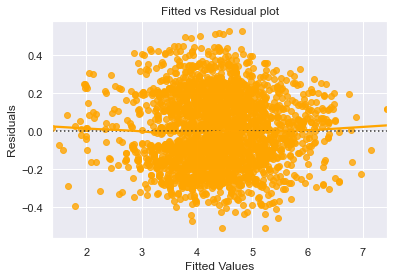

In [134]:
# Plot the fitted values and residuals

sns.residplot(data = df_pred, x="Fitted_Vals", y="Residuals",color = "orange", lowess = True)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

#### This looks ok.  The assumtions of linearity and independence are satisfied.

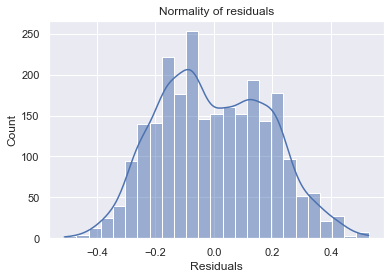

In [135]:
sns.histplot(data=df_pred, x="Residuals", kde=True)
plt.title("Normality of residuals")
plt.show()

#### Well, this is kind of bell with a dent.  I am going to go with it and say this a mostly normal distribution.

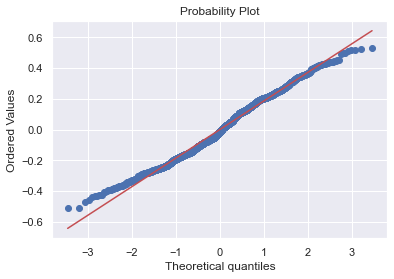

In [136]:
import pylab
import scipy.stats as stats

stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab)
plt.show()

#### Yay!  the graph of the residuals mostly follows a straight line!  

In [137]:
stats.shapiro(df_pred["Residuals"])

ShapiroResult(statistic=0.9885457158088684, pvalue=2.8262345263575794e-13)

#### The p-value is <.05 the residuals are not normal, but for some reason (I'm not sure why - we are able to accept this as being close to normal.

#### Now for goldfeldquant testing for homoscedasticity.

In [138]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], x_train3)
lzip(name, test)

[('F statistic', 0.9187490973459076), ('p-value', 0.9315697478676188)]

#### Yay! the p-value is greater than .05 so the residuals are homoscedastic.

#### Now I am going to run the model on the test dataset and check the performance

In [139]:
olsmodel4 = sm.OLS(y_test, x_test3).fit()
print(olsmodel4.summary())

                            OLS Regression Results                            
Dep. Variable:         used_price_log   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     1175.
Date:                Thu, 19 Aug 2021   Prob (F-statistic):               0.00
Time:                        14:41:46   Log-Likelihood:                 243.26
No. Observations:                1072   AIC:                            -454.5
Df Residuals:                    1056   BIC:                            -374.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 -184.9127 

In [140]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel4_train_perf = model_performance_regression(olsmodel4, x_test3, y_test)
olsmodel4_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.192847,0.162309,0.943449,0.942592,NaN


### Conclusions
* Relief that the model seems to work.  
* The new price of a phone is the most significant predictor of the used price.
* Release year and 5g also have a positive impact on the used price with 4g and some of the brand having a negative impact on the used price.
* There are 34 companies in the used phone market.
* About 90% of the used phone market is dominated by Android devices.
* The average amount of Ram various by brand with a maximun amount of 6.36 ram and minimum amount of 1.47 
* There are 23 budget brands(less than 250 Euros) that offer high mp selfie cameras. That is 68% of the brands are offering these high mp, low cost phones.
* All 34 companies offer phones with a screen size greater than 6 inches
* The new phone price Which attributes are highly correlated with the used phone price?